# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data\train-images-idx3-ubyte.gz


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data\train-labels-idx1-ubyte.gz


Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

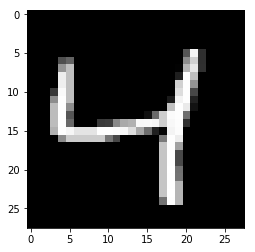

In [4]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [59]:
# Size of the encoding layer (the hidden layer)
# encoding_dim = 32  # feel free to change this value
# 
# inputs_ = tf.placeholder(tf.float32, [None, 784])
# targets_ = tf.placeholder(tf.float32, [None, 784])
# # labels_ = tf.reshape(targets_, [-1, 784])
# # Output of hidden layer
# # inputs_ = tf.reshape(inputs_, [-1, 784])
# stddev = 1/tf.sqrt(tf.cast(encoding_dim, tf.float32))
# weight = tf.Variable(tf.truncated_normal([784, encoding_dim], 0.0, stddev))
# bais = tf.Variable(tf.zeros(encoding_dim, tf.float32))
# encoded = tf.nn.relu(tf.add(tf.matmul(inputs_, weight), bais))
# 
# # Output layer logits
# stddev_2 = 1/tf.sqrt(tf.cast(784, tf.float32))
# weight_2 = tf.Variable(tf.truncated_normal([encoding_dim, 784], 0.0, stddev_2))
# bais_2 = tf.Variable(tf.zeros(784, tf.float32))
# logits = tf.add(tf.matmul(encoded, weight_2), bais_2)
# 
# # Sigmoid output from logits
# decoded = tf.nn.sigmoid(logits)
# 
# # Sigmoid cross-entropy loss
# loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=decoded, labels=targets_)
# 
# # Mean of the loss
# cost = tf.reduce_mean(loss)
# 
# # Adam optimizer
# adam = tf.train.AdamOptimizer(0.001)
# opt = adam.minimize(cost)

encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [60]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [61]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6926
Epoch: 1/20... Training loss: 0.6887
Epoch: 1/20... Training loss: 0.6845
Epoch: 1/20... Training loss: 0.6796
Epoch: 1/20... Training loss: 0.6740
Epoch: 1/20... Training loss: 0.6665
Epoch: 1/20... Training loss: 0.6585
Epoch: 1/20... Training loss: 0.6481
Epoch: 1/20... Training loss: 0.6379
Epoch: 1/20... Training loss: 0.6270
Epoch: 1/20... Training loss: 0.6114
Epoch: 1/20... Training loss: 0.5971
Epoch: 1/20... Training loss: 0.5828
Epoch: 1/20... Training loss: 0.5656
Epoch: 1/20... Training loss: 0.5461
Epoch: 1/20... Training loss: 0.5278
Epoch: 1/20... Training loss: 0.5070
Epoch: 1/20... Training loss: 0.4908
Epoch: 1/20... Training loss: 0.4737
Epoch: 1/20... Training loss: 0.4554
Epoch: 1/20... Training loss: 0.4400
Epoch: 1/20... Training loss: 0.4230
Epoch: 1/20... Training loss: 0.4085
Epoch: 1/20... Training loss: 0.3897
Epoch: 1/20... Training loss: 0.3849
Epoch: 1/20... Training loss: 0.3730
Epoch: 1/20... Training loss: 0.3595
E


Epoch: 1/20... Training loss: 0.2732
Epoch: 1/20... Training loss: 0.2757
Epoch: 1/20... Training loss: 0.2753
Epoch: 1/20... Training loss: 0.2705
Epoch: 1/20... Training loss: 0.2730
Epoch: 1/20... Training loss: 0.2723
Epoch: 1/20... Training loss: 0.2732
Epoch: 1/20... Training loss: 0.2721
Epoch: 1/20... Training loss: 0.2684
Epoch: 1/20... Training loss: 0.2690
Epoch: 1/20... Training loss: 0.2675
Epoch: 1/20... Training loss: 0.2687
Epoch: 1/20... Training loss: 0.2648
Epoch: 1/20... Training loss: 0.2633
Epoch: 1/20... Training loss: 0.2637
Epoch: 1/20... Training loss: 0.2663
Epoch: 1/20... Training loss: 0.2654
Epoch: 1/20... Training loss: 0.2589
Epoch: 1/20... Training loss: 0.2596
Epoch: 1/20... Training loss: 0.2602
Epoch: 1/20... Training loss: 0.2604
Epoch: 1/20... Training loss: 0.2556
Epoch: 1/20... Training loss: 0.2628
Epoch: 1/20... Training loss: 0.2583
Epoch: 1/20... Training loss: 0.2554
Epoch: 1/20... Training loss: 0.2533
Epoch: 1/20... Training loss: 0.2581


Epoch: 1/20... Training loss: 0.2205
Epoch: 1/20... Training loss: 0.2328
Epoch: 1/20... Training loss: 0.2306
Epoch: 1/20... Training loss: 0.2265
Epoch: 1/20... Training loss: 0.2246
Epoch: 1/20... Training loss: 0.2213
Epoch: 1/20... Training loss: 0.2240
Epoch: 1/20... Training loss: 0.2246
Epoch: 1/20... Training loss: 0.2187
Epoch: 1/20... Training loss: 0.2216
Epoch: 1/20... Training loss: 0.2208
Epoch: 1/20... Training loss: 0.2198
Epoch: 1/20... Training loss: 0.2243
Epoch: 1/20... Training loss: 0.2165
Epoch: 1/20... Training loss: 0.2211
Epoch: 1/20... Training loss: 0.2218
Epoch: 1/20... Training loss: 0.2155
Epoch: 1/20... Training loss: 0.2233
Epoch: 1/20... Training loss: 0.2121
Epoch: 1/20... Training loss: 0.2151
Epoch: 1/20... Training loss: 0.2198
Epoch: 1/20... Training loss: 0.2133
Epoch: 1/20... Training loss: 0.2197
Epoch: 1/20... Training loss: 0.2142
Epoch: 1/20... Training loss: 0.2133
Epoch: 1/20... Training loss: 0.2154


Epoch: 1/20... Training loss: 0.2164
Epoch: 1/20... Training loss: 0.2159
Epoch: 1/20... Training loss: 0.2168
Epoch: 1/20... Training loss: 0.2125
Epoch: 1/20... Training loss: 0.2177
Epoch: 1/20... Training loss: 0.2147
Epoch: 1/20... Training loss: 0.2132
Epoch: 1/20... Training loss: 0.2157
Epoch: 1/20... Training loss: 0.2179
Epoch: 1/20... Training loss: 0.2116
Epoch: 1/20... Training loss: 0.2189
Epoch: 1/20... Training loss: 0.2107
Epoch: 1/20... Training loss: 0.2057
Epoch: 1/20... Training loss: 0.2137
Epoch: 1/20... Training loss: 0.2099
Epoch: 1/20... Training loss: 0.2023
Epoch: 1/20... Training loss: 0.2035
Epoch: 1/20... Training loss: 0.2074
Epoch: 1/20... Training loss: 0.2094
Epoch: 1/20... Training loss: 0.2088
Epoch: 1/20... Training loss: 0.2130
Epoch: 1/20... Training loss: 0.2005
Epoch: 1/20... Training loss: 0.2092
Epoch: 1/20... Training loss: 0.2066
Epoch: 1/20... Training loss: 0.2031
Epoch: 1/20... Training loss: 0.2063
Epoch: 1/20... Training loss: 0.2059
E

 Training loss: 0.1928
Epoch: 1/20... Training loss: 0.1929
Epoch: 1/20... Training loss: 0.1956
Epoch: 1/20... Training loss: 0.1888
Epoch: 1/20... Training loss: 0.1981
Epoch: 1/20... Training loss: 0.1862
Epoch: 1/20... Training loss: 0.1926
Epoch: 1/20... Training loss: 0.1960
Epoch: 1/20... Training loss: 0.1942
Epoch: 1/20... Training loss: 0.1949
Epoch: 1/20... Training loss: 0.1937
Epoch: 1/20... Training loss: 0.1902
Epoch: 1/20... Training loss: 0.1888
Epoch: 1/20... Training loss: 0.1932
Epoch: 1/20... Training loss: 0.1920
Epoch: 1/20... Training loss: 0.1880
Epoch: 1/20... Training loss: 0.1928
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1863
Epoch: 1/20... Training loss: 0.1854
Epoch: 1/20... Training loss: 0.1927
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1861
Epoch: 1/20... Training loss: 0.1944
Epoch: 1/20... Training loss: 0.1856
Epoch: 1/20... Training loss: 0.1867
Epoch: 1/20... Training loss: 0.1871
Epoch: 1/20... 

Epoch: 1/20... Training loss: 0.1791
Epoch: 1/20... Training loss: 0.1755
Epoch: 1/20... Training loss: 0.1840
Epoch: 1/20... Training loss: 0.1862
Epoch: 1/20... Training loss: 0.1799
Epoch: 1/20... Training loss: 0.1808
Epoch: 1/20... Training loss: 0.1755
Epoch: 2/20... Training loss: 0.1780
Epoch: 2/20... Training loss: 0.1775
Epoch: 2/20... Training loss: 0.1786
Epoch: 2/20... Training loss: 0.1769
Epoch: 2/20... Training loss: 0.1828
Epoch: 2/20... Training loss: 0.1845
Epoch: 2/20... Training loss: 0.1754
Epoch: 2/20... Training loss: 0.1823
Epoch: 2/20... Training loss: 0.1762
Epoch: 2/20... Training loss: 0.1826
Epoch: 2/20... Training loss: 0.1829
Epoch: 2/20... Training loss: 0.1799
Epoch: 2/20... Training loss: 0.1779
Epoch: 2/20... Training loss: 0.1814
Epoch: 2/20... Training loss: 0.1769
Epoch: 2/20... Training loss: 0.1745
Epoch: 2/20... Training loss: 0.1770
Epoch: 2/20... Training loss: 0.1794
Epoch: 2/20... Training loss: 0.1799
Epoch: 2/20... Training loss: 0.1763
E

Epoch: 2/20... Training loss: 0.1723
Epoch: 2/20... Training loss: 0.1693
Epoch: 2/20... Training loss: 0.1700
Epoch: 2/20... Training loss: 0.1646
Epoch: 2/20... Training loss: 0.1676
Epoch: 2/20... Training loss: 0.1658
Epoch: 2/20... Training loss: 0.1674
Epoch: 2/20... Training loss: 0.1659
Epoch: 2/20... Training loss: 0.1731
Epoch: 2/20... Training loss: 0.1676
Epoch: 2/20... Training loss: 0.1722
Epoch: 2/20... Training loss: 0.1680
Epoch: 2/20... Training loss: 0.1698
Epoch: 2/20... Training loss: 0.1731
Epoch: 2/20... Training loss: 0.1750
Epoch: 2/20... Training loss: 0.1659
Epoch: 2/20... Training loss: 0.1711
Epoch: 2/20... Training loss: 0.1724
Epoch: 2/20... Training loss: 0.1702
Epoch: 2/20... Training loss: 0.1665
Epoch: 2/20... Training loss: 0.1687
Epoch: 2/20... Training loss: 0.1667
Epoch: 2/20... Training loss: 0.1657
Epoch: 2/20... Training loss: 0.1722
Epoch: 2/20... Training loss: 0.1639
Epoch: 2/20... Training loss: 0.1667
Epoch: 2/20... Training loss: 0.1669
E

Epoch: 2/20... Training loss: 0.1645
Epoch: 2/20... Training loss: 0.1666
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1652
Epoch: 2/20... Training loss: 0.1662
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1608
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1582
Epoch: 2/20... Training loss: 0.1584
Epoch: 2/20... Training loss: 0.1599
Epoch: 2/20... Training loss: 0.1590
Epoch: 2/20... Training loss: 0.1646
Epoch: 2/20... Training loss: 0.1613
Epoch: 2/20... Training loss: 0.1587
Epoch: 2/20... Training loss: 0.1616
Epoch: 2/20... Training loss: 0.1587
Epoch: 2/20... Training loss: 0.1620
Epoch: 2/20... Training loss: 0.1605
Epoch: 2/20... Training loss: 0.1520
Epoch: 2/20... Training loss: 0.1594
Epoch: 2/20... Training loss: 0.1648
Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1676
Epoch: 2/20... Training loss: 0.1536
Epoch: 2/20... Training loss: 0.1582
E

Epoch: 2/20... Training loss: 0.1586
Epoch: 2/20... Training loss: 0.1587
Epoch: 2/20... Training loss: 0.1595
Epoch: 2/20... Training loss: 0.1524
Epoch: 2/20... Training loss: 0.1599
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1516
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1595
Epoch: 2/20... Training loss: 0.1589
Epoch: 2/20... Training loss: 0.1620
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1503
Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1631
Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1607
Epoch: 2/20... Training loss: 0.1513
Epoch: 2/20... Training loss: 0.1516
Epoch: 2/20... Training loss: 0.1553
E

 Training loss: 0.1459
Epoch: 2/20... Training loss: 0.1518
Epoch: 2/20... Training loss: 0.1502
Epoch: 2/20... Training loss: 0.1443
Epoch: 2/20... Training loss: 0.1453
Epoch: 2/20... Training loss: 0.1470
Epoch: 2/20... Training loss: 0.1442
Epoch: 2/20... Training loss: 0.1489
Epoch: 2/20... Training loss: 0.1536
Epoch: 2/20... Training loss: 0.1508
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1469
Epoch: 2/20... Training loss: 0.1464
Epoch: 2/20... Training loss: 0.1497
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1457
Epoch: 2/20... Training loss: 0.1448
Epoch: 2/20... Training loss: 0.1509
Epoch: 2/20... Training loss: 0.1436
Epoch: 2/20... Training loss: 0.1477
Epoch: 2/20... Training loss: 0.1505
Epoch: 2/20... Training loss: 0.1484
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1596
Epoch: 2/20... Training loss: 0.1480
Epoch: 2/20... Training loss: 0.1491
Epoch: 2/20... 

Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1440
Epoch: 3/20... Training loss: 0.1466
Epoch: 3/20... Training loss: 0.1418
Epoch: 3/20... Training loss: 0.1455
Epoch: 3/20... Training loss: 0.1511
Epoch: 3/20... Training loss: 0.1414
Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1429
Epoch: 3/20... Training loss: 0.1438
Epoch: 3/20... Training loss: 0.1454
Epoch: 3/20... Training loss: 0.1405
Epoch: 3/20... Training loss: 0.1482
Epoch: 3/20... Training loss: 0.1430
Epoch: 3/20... Training loss: 0.1439
Epoch: 3/20... Training loss: 0.1422
Epoch: 3/20... Training loss: 0.1462
Epoch: 3/20... Training loss: 0.1436
Epoch: 3/20... Training loss: 0.1451
Epoch: 3/20... Training loss: 0.1464
Epoch: 3/20... Training loss: 0.1405
Epoch: 3/20... Training loss: 0.1495
Epoch: 3/20... Training loss: 0.1433
Epoch: 3/20... Training loss: 0.1331
Epoch: 3/20... Training loss: 0.1398
Epoch: 3/20... Training loss: 0.1434
Epoch: 3/20... T

 Training loss: 0.1424
Epoch: 3/20... Training loss: 0.1411
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1390
Epoch: 3/20... Training loss: 0.1411
Epoch: 3/20... Training loss: 0.1426
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1451
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1455
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1410
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1415
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1410
Epoch: 3/20... Training loss: 0.1397
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1379
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1402
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1424
Epoch: 3/20... 


Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1396
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1272
Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1306
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1317
Epoch: 3/20... Training loss: 0.1391
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1403
Epoch: 3/20... Training loss: 0.1292
Epoch: 3/20... Training loss: 0.1293
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1388
Epoch: 3/20... Training loss: 0.1309


Epoch: 3/20... Training loss: 0.1315
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1309
Epoch: 3/20... Training loss: 0.1294
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1312
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1276
Epoch: 3/20... Training loss: 0.1326
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1296
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1303
Epoch: 3/20... Training loss: 0.1308
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1298
Epoch: 3/20... Training loss: 0.1381
E

 Training loss: 0.1272
Epoch: 3/20... Training loss: 0.1288
Epoch: 3/20... Training loss: 0.1308
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1298
Epoch: 3/20... Training loss: 0.1310
Epoch: 3/20... Training loss: 0.1262
Epoch: 3/20... Training loss: 0.1259
Epoch: 3/20... Training loss: 0.1244
Epoch: 3/20... Training loss: 0.1271
Epoch: 3/20... Training loss: 0.1259
Epoch: 3/20... Training loss: 0.1274
Epoch: 3/20... Training loss: 0.1247
Epoch: 3/20... Training loss: 0.1290
Epoch: 3/20... Training loss: 0.1275
Epoch: 3/20... Training loss: 0.1279
Epoch: 3/20... Training loss: 0.1312
Epoch: 3/20... Training loss: 0.1244
Epoch: 3/20... Training loss: 0.1299
Epoch: 3/20... Training loss: 0.1253
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1306
Epoch: 3/20... Training loss: 0.1255
Epoch: 3/20... Training loss: 0.1280
Epoch: 3/20... Training loss: 0.1291
Epoch: 3/20... Training loss: 0.1293
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... 

 Training loss: 0.1282
Epoch: 4/20... Training loss: 0.1265
Epoch: 4/20... Training loss: 0.1297
Epoch: 4/20... Training loss: 0.1260
Epoch: 4/20... Training loss: 0.1278
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1285
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1289
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1294
Epoch: 4/20... Training loss: 0.1257
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1258
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1315
Epoch: 4/20... Training loss: 0.1304
Epoch: 4/20... 

 Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... 

Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1205
E

Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1174
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1192
E

Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1125
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1189
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1120
Epoch: 4/20... Training loss: 0.1117
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1105
Epoch: 4/20... Training loss: 0.1138
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1142
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1105
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1128
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1117
Epoch: 4/20... Training loss: 0.1173
E

 Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1183
Epoch: 5/20... Training loss: 0.1172
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1177
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1167
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1171
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1162
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1167
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1148
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1160
Epoch: 5/20... Training loss: 0.1160
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1154
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... 

 Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1160
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1152
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1159
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... 

Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1132
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1146
E

Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1064
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1062
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1041
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1091
E

Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1042
Epoch: 5/20... Training loss: 0.1002
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1062
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1064
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1027
Epoch: 5/20... Training loss: 0.1056
Epoch: 5/20... Training loss: 0.1055
E

Training loss: 0.1045
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1059
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1053
Epoch: 5/20... Training loss: 0.1044
Epoch: 5/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1097
Epoch: 6/20... Training loss: 0.1098
Epoch: 6/20... Training loss: 0.1098
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1017
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1098
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... T

 Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1092
Epoch: 6/20... Training loss: 0.1104
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1020
Epoch: 6/20... 

Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1096
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1006
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.1005
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.0998
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1070
E

Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.0996
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1010
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1003
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1013
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1011
E

Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1015
Epoch: 6/20... Training loss: 0.1020
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1010
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1015
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1006
Epoch: 6/20... Training loss: 0.1004
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1004
Epoch: 6/20... Training loss: 0.1008
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1002
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... T

 Training loss: 0.1003
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.0988
Epoch: 6/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1051
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.0970
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1058
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1062
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1062
Epoch: 7/20... Training loss: 0.1047
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... 

Epoch: 7/20... Training loss: 0.0969
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1051
Epoch: 7/20... Training loss: 0.1050
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1058
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.1017
E

Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0966
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1005
E

Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0957
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1057
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.0968
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.0980
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.0962
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0986
E

Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.0957
Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.0980
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.0980
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.0988
E

Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.0966
Epoch: 7/20... Training loss: 0.0955
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.0965
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0952
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0952
Epoch: 7/20... Training loss: 0.0980
Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0958
E

 Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... 

Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0945
Epoch: 8/20... Training loss: 0.1017
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.1013
Epoch: 8/20... Training loss: 0.0950
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... T

Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0928
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0926
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0933
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0948
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0981
E

 Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0929
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0940
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... 

Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0943
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.0940
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0947
Epoch: 8/20... Training loss: 0.0947
Epoch: 8/20... Training loss: 0.0929
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0924
Epoch: 8/20... Training loss: 0.0952
E

Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.1001
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.1016
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... T

Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.1007
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0937
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0965
E

Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.1000
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.1004
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.1001
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0930
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.1001
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0965
E

Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0924
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0924
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0931
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0987
E

Training loss: 0.0967
Epoch: 9/20... Training loss: 0.1027
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0924
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0917
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0926
Epoch: 9/20... Training loss: 0.1001
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... T

Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0920
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0920
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0907
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0

Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0923
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0994
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0995
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0995
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.1001
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20


Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.1001
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.1028
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0908
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0914
Epoch: 10/2

Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0997
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0924
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0902
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0920
Epoch: 11/20... Training loss: 0.0909
Epoch: 11/20... Training loss: 0.0987
Epoch: 11/20... Training loss: 0.0992
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0891
Epoch: 11/20... Training loss: 0.0899
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.1005
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0920
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0985
Epoch: 11/20... Training loss: 0.0995
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0903
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20

 Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0910
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0915
Epoch: 11/20... Training loss: 0.0908
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training lo

Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0899
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0903
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0992
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0914
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0981
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0901
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0976
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0909
Epoch: 12/20

 Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0980
Epoch: 12/20... Training loss: 0.0911
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0909
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0909
Epoch: 12/20... Training lo

 Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0904
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0981
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0978
Epoch: 12/20... Training loss: 0.0986
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0990
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training lo

Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0894
Epoch: 12/20... Training loss: 0.0910
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0973
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0896
Epoch: 12/20... Training loss: 0.0987
Epoch: 12/20... Training loss: 0.0899
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0980
Epoch: 12/20... Training loss: 0.0911
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0983
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0890
Epoch: 12/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0900
Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0977
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0904
Epoch: 13/20... Training loss: 0.0979
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0902
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0905
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20

 Training loss: 0.0906
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0892
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0993
Epoch: 13/20... Training loss: 0.0981
Epoch: 13/20... Training loss: 0.0985
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0967


Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0894
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0876
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0906
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0998
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0979
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0977
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0900
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0986
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0980
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20

 Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0906
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0896
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training lo

 Training loss: 0.0893
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0980
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0897
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0973
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training lo

Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0978
Epoch: 14/20... Training loss: 0.0968
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0896
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20


Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0899
Epoch: 14/20... Training loss: 0.0979
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0983
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0899
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0988
Epoch: 14/2

Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0899
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0899
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20

 Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0900
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0899
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0903
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training lo

Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0978
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0901
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20

 Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0983
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0979
Epoch: 15/20... Training loss: 0.0894
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0902
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0971
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training lo

 Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0882
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0879
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0977
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0985
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0949


Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0903
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0896
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20

 Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0899
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training lo

Epoch: 15/20... Training loss: 0.0908
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0896
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20

 Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0903
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0900
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training lo

Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0894
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0927


Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0901
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20

 Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0976
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training lo

Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20


Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/2

Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0885
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0896
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20


Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0969
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0915


Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0896
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20

Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0888
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training los

Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0976
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0898
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0970
Epoch: 18/20... Training los

 Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0980
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training lo


Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/2

Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0890
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20...

 Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0982
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0898
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0891
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0967
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0963
Epoch: 18/20... Training lo

Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0886
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0967
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0899
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0890
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20

 Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0889
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0967
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training lo

 Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0983
Epoch: 19/20... Training loss: 0.0985
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training lo

Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0884
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0903
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0954


Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0987
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0972
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0900
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0900
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0892
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0892
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20

 Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0885
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0967
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training lo

Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0899
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0982
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0975
Epoch: 20/20

 Training loss: 0.0976
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training lo

Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0894
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0897
Epoch: 20/20... Training loss: 0.0875
Epoch: 20/20... Training los

Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0893
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0906
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0975
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20

 Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0893
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0923


## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

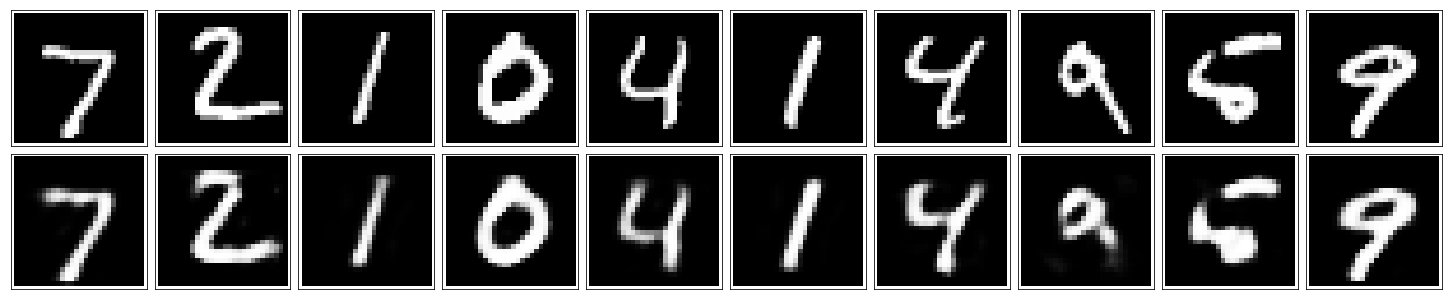

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [39]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.